In [1]:
import numpy as np
import pandas as pd

In [2]:
bureau= pd.read_csv('bureau.csv')
bureau_balance= pd.read_csv('bureau_balance.csv')

In [3]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [4]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
missing_values_table(bureau)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


In [6]:
len(bureau)

1716428

In [7]:
bureau_balance.isna().sum()/len(bureau_balance)

SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

In [8]:
new_bureau=bureau.drop(columns=["DAYS_CREDIT_ENDDATE", "DAYS_ENDDATE_FACT", "AMT_CREDIT_MAX_OVERDUE" ,"AMT_CREDIT_SUM_DEBT","AMT_CREDIT_SUM_LIMIT","AMT_ANNUITY"])

In [9]:
new_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,0,91323.0,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,0,225000.0,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,0,0,464323.5,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,0,90000.0,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,0,2700000.0,0.0,Consumer credit,-21


In [10]:
merg_bureau=new_bureau.join(bureau_balance, how="left", lsuffix='SK_ID_BUREAU', rsuffix='SK_ID_BUREAU')

In [11]:
missing_values_table(new_bureau)

Your selected dataframe has 11 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
AMT_CREDIT_SUM,13,0.0


In [12]:
len(new_bureau)

1716428

In [13]:
#merg_bureau.head()

In [14]:
#merg_bureau.to_csv("merg_bureau.csv", index=False)

In [16]:
train_data= pd.read_csv('application_train.csv')
test_data= pd.read_csv('application_test.csv')

In [20]:
X=pd.concat((train_data, test_data), axis=0, ignore_index=True,sort = False)

In [21]:
test_data.shape

(48744, 121)

In [22]:
train_data.shape

(307511, 122)

In [23]:
merg_1=X.join(merg_bureau, how="left", lsuffix='SK_ID_CURR', rsuffix='SK_ID_CURR')

In [24]:
len(merg_1)

356255

In [26]:
merg_CI= pd.read_csv('credit_installment.csv')

In [27]:
merg_2=merg_1.join(merg_CI, how="left", lsuffix='SK_ID_CURR', rsuffix='SK_ID_CURR')

In [28]:
len(merg_2)

356255

In [34]:
prec_app= pd.read_csv('previous_application.csv')
POS_cash= pd.read_csv('POS_cash_balance.csv')

In [35]:
POS_cash.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [36]:
prec_app.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [38]:
prec_app.shape

(1670214, 37)

In [40]:
#prec_app=prec_app.drop(columns=['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE'])
#prec_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,17145.0,17145.0,0.0,SATURDAY,15,Y,1,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,607500.0,679671.0,NaN,THURSDAY,11,Y,1,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,112500.0,136444.5,NaN,TUESDAY,11,Y,1,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,450000.0,470790.0,NaN,MONDAY,7,Y,1,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,337500.0,404055.0,NaN,THURSDAY,9,Y,1,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,267295.5,311400.0,0.0,WEDNESDAY,12,Y,1,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,87750.0,64291.5,29250.0,TUESDAY,15,Y,1,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,105237.0,102523.5,10525.5,MONDAY,12,Y,1,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,180000.0,191880.0,NaN,WEDNESDAY,9,Y,1,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [43]:
prec_app = prec_app.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

In [44]:
prec_app.shape

(1670214, 21)

In [45]:
POS_cash=POS_cash.drop(columns=['CNT_INSTALMENT','CNT_INSTALMENT_FUTURE'])

In [46]:
len(POS_cash)

10001358

In [47]:
merg_PC=prec_app.join(POS_cash, how="left", lsuffix='SK_ID_CURR', rsuffix='SK_ID_CURR')

In [48]:
len(merg_PC)

1670214

In [52]:
merg_3=merg_2.join(merg_PC, how="left", lsuffix='SK_ID_CURR', rsuffix='SK_ID_CURR')

In [50]:
merg_3.shape

(356255, 183)

In [51]:
missing_values_table(merg_3).head()

Your selected dataframe has 183 columns.
There are 69 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,248360,69.7
COMMONAREA_MEDI,248360,69.7
COMMONAREA_MODE,248360,69.7
NONLIVINGAPARTMENTS_MEDI,246861,69.3
NONLIVINGAPARTMENTS_MODE,246861,69.3


In [53]:
for col in (merg_3.loc[:, merg_3.isna().sum()>100000]):
    print(f"'{col}'" , end=',')

'OWN_CAR_AGE','OCCUPATION_TYPE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE',

In [54]:
merg_4=merg_3.drop(columns=['APARTMENTS_AVG','APARTMENTS_MEDI','APARTMENTS_MODE','BASEMENTAREA_AVG','BASEMENTAREA_MEDI',
                            'BASEMENTAREA_MODE','COMMONAREA_AVG','COMMONAREA_MEDI','COMMONAREA_MODE','ELEVATORS_AVG',
                            'ELEVATORS_MEDI','ELEVATORS_MODE','EMERGENCYSTATE_MODE','ENTRANCES_AVG','ENTRANCES_MEDI','ENTRANCES_MODE',
                            'EXT_SOURCE_1','FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','FLOORSMIN_AVG','FLOORSMIN_MEDI',
                            'FLOORSMIN_MODE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','LANDAREA_AVG','LANDAREA_MEDI','LANDAREA_MODE',
                            'LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE','LIVINGAREA_AVG','LIVINGAREA_MEDI',
                            'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MODE',
                            'NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','NONLIVINGAREA_MODE','OCCUPATION_TYPE',
                            'OWN_CAR_AGE','TOTALAREA_MODE','WALLSMATERIAL_MODE','YEARS_BEGINEXPLUATATION_AVG',
                            'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_AVG','YEARS_BUILD_MEDI',
                            'YEARS_BUILD_MODE'])

In [55]:
merg_4.shape

(356255, 133)

In [56]:
merg_4.head()

,SK_ID_CURRSK_ID_CURRSK_ID_CURR,TARGET,NAME_CONTRACT_TYPESK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,SK_ID_PREVSK_ID_CURRSK_ID_CURR,SK_ID_CURRSK_ID_CURR,MONTHS_BALANCE,NAME_CONTRACT_STATUSSK_ID_CURR,SK_DPDSK_ID_CURR,SK_DPD_DEFSK_ID_CURR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Country-wide,35,Connectivity,middle,1803195,182943,-31,Active,0,0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Contact center,-1,XNA,low_action,1715348,367990,-33,Active,0,0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Credit and cash offices,-1,XNA,high,1784872,397406,-32,Active,0,0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Credit and cash offices,-1,XNA,middle,1903291,269225,-35,Active,0,0
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Credit and cash offices,-1,XNA,high,2341044,334279,-35,Active,0,0


In [57]:
merg_4_dummy = pd.get_dummies(merg_4)

In [58]:
merg_4_dummy.shape

(356255, 367)

In [59]:
correlation=merg_4.corr()['TARGET'].sort_values()
correlation.head(20)

EXT_SOURCE_3                        -0.178919
EXT_SOURCE_2                        -0.160472
DAYS_EMPLOYED                       -0.044932
AMT_GOODS_PRICE                     -0.039645
REGION_POPULATION_RELATIVE          -0.037227
AMT_CREDIT                          -0.030369
FLAG_DOCUMENT_6                     -0.028602
HOUR_APPR_PROCESS_STARTSK_ID_CURR   -0.024166
FLAG_PHONE                          -0.023806
AMT_ANNUITY                         -0.012817
AMT_REQ_CREDIT_BUREAU_MON           -0.012462
FLAG_DOCUMENT_16                    -0.011615
FLAG_DOCUMENT_13                    -0.011583
FLAG_DOCUMENT_14                    -0.009464
FLAG_DOCUMENT_8                     -0.008040
FLAG_DOCUMENT_18                    -0.007952
FLAG_DOCUMENT_15                    -0.006536
MONTHS_BALANCESK_ID_CURR            -0.005262
FLAG_DOCUMENT_9                     -0.004352
FLAG_DOCUMENT_11                    -0.004229
Name: TARGET, dtype: float64

In [60]:
correlation.tail(10)

FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

In [62]:
missing_values_table(merg_4_dummy)

Your selected dataframe has 367 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
EXT_SOURCE_3,69633,19.5
TARGET,48744,13.7
AMT_REQ_CREDIT_BUREAU_HOUR,47568,13.4
AMT_REQ_CREDIT_BUREAU_YEAR,47568,13.4
AMT_REQ_CREDIT_BUREAU_QRT,47568,13.4
AMT_REQ_CREDIT_BUREAU_MON,47568,13.4
AMT_REQ_CREDIT_BUREAU_WEEK,47568,13.4
AMT_REQ_CREDIT_BUREAU_DAY,47568,13.4
DEF_60_CNT_SOCIAL_CIRCLE,1050,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1050,0.3


In [63]:
merg_4_dummy.loc[merg_4_dummy.EXT_SOURCE_3.isnull(), 'EXT_SOURCE_3']=-1
merg_4_dummy.loc[merg_4_dummy.EXT_SOURCE_2.isnull(), 'EXT_SOURCE_2']=-1
merg_4_dummy.loc[merg_4_dummy.AMT_REQ_CREDIT_BUREAU_DAY.isnull(), 'AMT_REQ_CREDIT_BUREAU_DAY']=0
merg_4_dummy.loc[merg_4_dummy.AMT_REQ_CREDIT_BUREAU_QRT.isnull(), 'AMT_REQ_CREDIT_BUREAU_QRT']=0
merg_4_dummy.loc[merg_4_dummy.AMT_REQ_CREDIT_BUREAU_HOUR.isnull(), 'AMT_REQ_CREDIT_BUREAU_HOUR']=0
merg_4_dummy.loc[merg_4_dummy.AMT_REQ_CREDIT_BUREAU_YEAR.isnull(), 'AMT_REQ_CREDIT_BUREAU_YEAR']=0
merg_4_dummy.loc[merg_4_dummy.AMT_REQ_CREDIT_BUREAU_WEEK.isnull(), 'AMT_REQ_CREDIT_BUREAU_WEEK']=0
merg_4_dummy.loc[merg_4_dummy.AMT_REQ_CREDIT_BUREAU_MON.isnull(), 'AMT_REQ_CREDIT_BUREAU_MON']=0

merg_4_dummy.loc[merg_4_dummy.DEF_30_CNT_SOCIAL_CIRCLE.isnull(), 'DEF_30_CNT_SOCIAL_CIRCLE']=-1
merg_4_dummy.loc[merg_4_dummy.DEF_60_CNT_SOCIAL_CIRCLE.isnull(), 'DEF_60_CNT_SOCIAL_CIRCLE']=-1
merg_4_dummy.loc[merg_4_dummy.OBS_30_CNT_SOCIAL_CIRCLE.isnull(), 'OBS_30_CNT_SOCIAL_CIRCLE']=-1
merg_4_dummy.loc[merg_4_dummy.OBS_60_CNT_SOCIAL_CIRCLE.isnull(), 'OBS_60_CNT_SOCIAL_CIRCLE']=-1

In [64]:
merg_4_dummy.loc[merg_4_dummy.AMT_GOODS_PRICE.isnull(), 'AMT_GOODS_PRICE']=merg_4_dummy.AMT_GOODS_PRICE.mean()
merg_4_dummy.loc[merg_4_dummy.AMT_ANNUITY.isnull(), 'AMT_ANNUITY']=merg_4_dummy.AMT_ANNUITY.median()
merg_4_dummy.loc[merg_4_dummy.CNT_FAM_MEMBERS.isnull(), 'CNT_FAM_MEMBERS']=merg_4_dummy.CNT_FAM_MEMBERS.mean()
merg_4_dummy.loc[merg_4_dummy.AMT_CREDIT_SUM.isnull(), 'AMT_CREDIT_SUM']=merg_4_dummy.AMT_CREDIT_SUM.mean()
merg_4_dummy.loc[merg_4_dummy.DAYS_LAST_PHONE_CHANGE.isnull(), 'DAYS_LAST_PHONE_CHANGE']=merg_4_dummy.DAYS_LAST_PHONE_CHANGE.mean()

In [65]:
merg_4_dummy.shape

(356255, 367)

In [72]:
X_train=merg_4_dummy[0:len(train_data)]

In [69]:
X_test=merg_4_dummy[len(train_data):]

In [70]:
X_train.to_csv("train_clean_data.csv")
X_test.to_csv("test_clean_data.csv")

In [11]:
import pandas as pd
X_train = pd.read_csv('train_clean_data.csv')
X_test = pd.read_csv('test_clean_data.csv')

In [13]:
X_pca=X_train.drop(columns=['TARGET'])
Y=X_train.TARGET

In [14]:
from sklearn.decomposition import PCA

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Text(0, 0.5, 'cumulative explained variance')

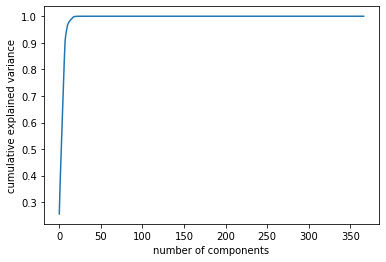

In [18]:
pca = PCA().fit(X_pca) # 'data' can be changed here
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [19]:
pca=PCA(0.99).fit(X_pca)
pca.n_components_

16

In [20]:
train_pca = pca.transform(X_pca)
train_pca =pd.DataFrame(train_pca)
train_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-2.620753e+05,-164586.977028,-285418.836993,1.005604e+06,-273847.772523,-110048.165127,-240796.124302,-69718.103229,-154573.227874,56867.590473,102682.577541,-67072.615136,54480.827857,-213635.083233,-73027.505053,54776.979060
1,-1.309913e+05,-124972.689612,875623.046329,9.288917e+05,200686.772907,248375.325943,-847993.579137,-44893.669611,433454.809491,25710.999323,44497.169859,-43558.179714,-89829.296554,-221263.185647,-35912.148113,-180037.463687
2,1.085711e+05,-159427.120817,-598525.343128,-2.322732e+05,347733.496501,-34421.317498,-534717.484614,-58106.617050,-61358.430468,-43103.016197,-124143.144971,-82415.362888,285133.594723,-202863.031733,-37619.922334,-183765.320417
3,-2.667808e+05,-149159.272729,-346446.419078,-7.351109e+05,507817.918610,120804.379881,-764887.131948,-46771.884262,274322.793124,11357.696203,-340224.470080,-72031.229198,-122621.908890,-224690.161115,-48564.184090,-79373.369101
4,2.342890e+06,-148553.652180,-129967.770326,-5.624365e+05,207852.724755,622064.224772,353900.260848,-40183.827887,160930.610295,-11551.652289,-830324.187851,-70150.015329,-170915.741363,-227594.497312,-23260.384906,-137976.559484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,6.212577e+05,242194.672449,-514889.938638,-5.842097e+04,656771.707356,471778.471142,-299697.076888,-87618.396579,-173504.278976,25879.990565,138392.711708,-70076.617429,-23934.634270,203845.370550,-7216.070764,-114919.117261
307507,-3.367296e+05,218927.558520,-545363.471629,8.662454e+05,-854694.027501,239605.770949,346750.474423,-106594.874237,-11802.421347,-66828.717022,-135843.446082,292320.975751,-111084.243055,191239.168056,-70381.442770,75889.461367
307508,-2.485959e+05,250083.237316,202549.182717,8.502491e+04,262679.098035,-986460.263358,-341480.524400,-114811.516219,280460.266404,-20830.367493,57659.792717,-68159.565115,-72837.485219,195869.427759,-66125.538507,80136.498205
307509,5.837383e+05,250542.894008,-269196.150854,-5.456544e+05,-337646.124241,-212602.497288,-701587.438045,-97878.618162,-173610.054809,39226.305260,-235328.287562,-70538.365741,-128701.410781,199179.896970,9506.698316,-193048.436458


In [81]:
X_test=X_test.drop(columns=['TARGET'])

In [82]:
test_pca = pca.transform(X_test)
test_pca =pd.DataFrame(test_pca)

In [8]:
train_pca.shape

NameError: name 'train_pca' is not defined

In [9]:
train_pca.to_csv("train_transfer_data.csv")
test_pca.to_csv("test_transfer_data.csv")

NameError: name 'train_pca' is not defined

In [1]:
conda install keras

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\FeimanLi\Applications

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           3 KB
    absl-py-0.9.0              |           py37_0         168 KB
    astor-0.8.0                |           py37_0          47 KB
    blinker-1.4                |           py37_0          22 KB
    cachetools-3.1.1           |             py_0          14 KB
    conda-4.8.2                |           py37_0         2.8 MB
    gast-0.2.2                 |           py37_0         155 KB
    google-auth-1.11.2         |             py_0          51 KB
    google-auth-oauthlib-0.4.1 |             py_2          20 KB
    google-pasta-0.1.8         |             py_0          43 KB
    grpcio-1.27.2              |   py37h351948d_0 

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

In [4]:
batch_size = 128
num_classes = 2
epochs = 20

In [5]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(10,)))
model.add(Dense(num_classes, activation='softmax'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_pca, Y,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_pca, y_test))

NameError: name 'train_pca' is not defined